<a href="https://colab.research.google.com/github/mattsum/kuIotBigdataclass/blob/main/mnistClassify%5BChattingProgramEX%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets

digit_dataset = datasets.load_digits()
digit_dataset.keys()


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [2]:
type(digit_dataset)

sklearn.utils._bunch.Bunch

In [3]:
digit_dataset["images"].shape


(1797, 8, 8)

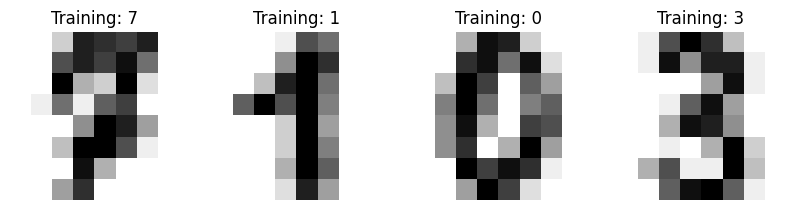

In [4]:
import matplotlib.pyplot as plt
from random import randint

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax in axes:
    num = randint(1, 1000)
    image = digit_dataset["images"][num]
    label = digit_dataset["target"][num]
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

X = digit_dataset["data"]
y = digit_dataset["target"]
# y data mapping 123 to one two three
y = pd.Series(y).map(
    {
        0: "zero",
        1: "one",
        2: "two",
        3: "three",
        4: "four",
        5: "five",
        6: "six",
        7: "seven",
        8: "eight",
        9: "nine",
    }
)
le = LabelEncoder()
y = le.fit_transform(y)
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y)


[9 4 8 ... 0 3 0]


In [6]:
print(X.shape, X_train.shape, X_test.shape)

(1797, 64) (1347, 64) (450, 64)


In [7]:
from sklearn.linear_model import LogisticRegression

logreg_ovr = LogisticRegression(multi_class="ovr")
logreg_softmax = LogisticRegression(multi_class="multinomial", solver="sag")

# model fit
logreg_ovr.fit(X_train, y_train)
logreg_softmax.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(multi_class='multinomial', solver='sag')

In [8]:
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
)

y_pred_ovr = logreg_ovr.predict(X_test)
y_pred_softmax = logreg_softmax.predict(X_test)
# print("ovr model:")
# print(confusion_matrix(y_test, y_pred_ovr))
# print("softmax model:")
# print(confusion_matrix(y_test, y_pred_softmax))
# convert to one two threee to 1 2 3
y_test = le.inverse_transform(y_test)
y_pred_ovr = le.inverse_transform(y_pred_ovr)
y_test

array(['four', 'eight', 'zero', 'five', 'two', 'two', 'one', 'one', 'six',
       'three', 'five', 'eight', 'two', 'zero', 'seven', 'one', 'six',
       'nine', 'one', 'two', 'seven', 'one', 'five', 'four', 'two',
       'zero', 'five', 'five', 'five', 'six', 'seven', 'zero', 'five',
       'seven', 'two', 'eight', 'three', 'eight', 'one', 'six', 'seven',
       'eight', 'four', 'one', 'nine', 'six', 'three', 'eight', 'three',
       'three', 'seven', 'nine', 'nine', 'one', 'one', 'eight', 'two',
       'seven', 'three', 'one', 'six', 'four', 'nine', 'two', 'eight',
       'zero', 'four', 'zero', 'three', 'eight', 'five', 'nine', 'two',
       'zero', 'three', 'three', 'six', 'three', 'nine', 'nine', 'three',
       'seven', 'three', 'seven', 'six', 'zero', 'five', 'zero', 'three',
       'four', 'three', 'four', 'nine', 'six', 'four', 'eight', 'eight',
       'two', 'four', 'nine', 'eight', 'three', 'seven', 'zero', 'one',
       'nine', 'zero', 'two', 'eight', 'three', 'six', 'nine',

In [21]:
print("ovr model:")
print(f"classification_report \n{classification_report(y_test, y_pred_ovr)}")
print("softmax model:")
print(f"classification_report \n{classification_report(y_test, y_pred_softmax)}")


ovr model:
classification_report 
              precision    recall  f1-score   support

       eight       0.94      0.90      0.92        52
        five       0.97      0.93      0.95        41
        four       0.98      0.95      0.96        43
        nine       0.96      0.94      0.95        50
         one       0.84      0.96      0.90        45
       seven       0.97      0.95      0.96        40
         six       1.00      0.98      0.99        47
       three       0.96      0.98      0.97        48
         two       1.00      1.00      1.00        42
        zero       0.98      1.00      0.99        42

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450

softmax model:


ValueError: Mix of label input types (string and number)

In [20]:
print("ovr model:")
print(f"accuracy_score: {accuracy_score(y_test, y_pred_ovr)}")
print("softmax model:")
print(f"accuracy_score: {accuracy_score(y_test, y_pred_softmax)}")

result = confusion_matrix(y_test, y_pred_ovr)
result.diagonal().sum() / result.sum()

ovr model:
accuracy_score: 0.9577777777777777
softmax model:
accuracy_score: 0.0


0.9577777777777777

In [19]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_ovr, pos_label=1)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [18]:
roc_auc = auc(fpr, tpr)
roc_auc


NameError: name 'fpr' is not defined

In [17]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, lw=lw, label="ROC curve ")
plt.show()

NameError: name 'fpr' is not defined

<Figure size 640x480 with 0 Axes>

In [15]:
# ovr model
for i in range(10):
    print(f"ovr model: probability of {i}: {logreg_ovr.predict_proba(X_test)[i]}")

ovr model: probability of 0: [1.00160387e-06 1.14372905e-13 9.99981773e-01 5.45939439e-19
 7.08222052e-08 7.68843568e-07 5.70761860e-10 3.23540019e-28
 1.61740233e-15 1.63850579e-05]
ovr model: probability of 1: [9.99986564e-01 1.06779255e-11 5.85914610e-06 2.91779560e-06
 7.71225474e-10 5.69624912e-10 2.72228356e-06 1.64168872e-07
 1.13804112e-08 1.75998866e-06]
ovr model: probability of 2: [3.60753427e-07 1.51272524e-07 3.23357282e-08 7.90239200e-05
 1.86874592e-11 7.18336334e-09 7.73397385e-08 3.09677805e-16
 6.85607557e-10 9.99920346e-01]
ovr model: probability of 3: [1.98979096e-07 9.99997496e-01 2.27526177e-06 3.77847226e-09
 1.76857593e-11 2.56055942e-12 1.29683997e-09 2.36542498e-08
 1.46996053e-17 7.87899192e-10]
ovr model: probability of 4: [4.77355699e-06 6.46521383e-10 5.94880839e-17 9.54142172e-13
 7.44481484e-10 1.37154598e-18 4.18001525e-12 6.15968319e-08
 9.99995163e-01 7.34517246e-13]
ovr model: probability of 5: [4.02584203e-02 5.39799891e-09 8.92169097e-12 1.42281777

In [16]:
# softmax model
for i in range(10):
    print(
        f"softmax model: probability of {i}: {logreg_softmax.predict_proba(X_test)[i]}"
    )


softmax model: probability of 0: [3.96050526e-08 3.04719192e-12 9.99997077e-01 7.31325598e-14
 1.96034731e-06 9.96131577e-08 6.99899168e-07 1.60548410e-17
 6.00245326e-16 1.23963848e-07]
softmax model: probability of 1: [9.99647375e-01 2.35037684e-09 3.93810836e-06 3.87122613e-06
 4.56221477e-07 1.96976113e-08 3.43708120e-04 7.30376455e-08
 1.36335375e-08 5.42329135e-07]
softmax model: probability of 2: [8.53424008e-10 4.66732756e-10 4.14104334e-12 2.20249172e-09
 7.07972949e-13 2.36423484e-11 1.60547700e-08 9.96166826e-15
 3.39853475e-14 9.99999980e-01]
softmax model: probability of 3: [9.48256609e-09 9.99999536e-01 3.33523461e-07 3.31199296e-08
 5.14885882e-10 1.87019444e-10 1.77642941e-10 8.66284272e-08
 6.36200923e-15 3.64473373e-11]
softmax model: probability of 4: [3.92653059e-09 1.02125433e-10 3.77102833e-17 4.74275220e-12
 1.17476994e-09 1.10885058e-14 8.94404397e-13 4.43701582e-08
 9.99999950e-01 1.11422867e-14]
softmax model: probability of 5: [9.27812421e-03 2.73215400e-07 2